## Юнит 7. Основные алгоритмы машинного обучения. Часть II 
### Skillfactory: DSPR-19


### ML-5. Решающие деревья и случайный лес 



### 5.1. Введение


Формально дерево решений — это связный ациклический граф. В нём можно выделить три типа вершин:

- Корневая вершина (root node) — откуда всё начинается.
- Внутренние вершины (intermediate nodes).
- Листья (leafs) — самые глубокие вершины дерева, в которых содержится «ответ».

Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву.

Определенный бонус решающего дерева в том, что его легко интерпретировать, а также легко визуализировать ход принятия решения. Однако есть и ряд недостатков. В целом достоинства и недостатки данного метода следующие:

**ДОСТОИНСТВА**

- Деревья требуют небольших усилий при подготовке данных (не требуется специфической предобработки).
- Дерево решений не требует нормализации/масштабирования данных.
- Наличие пропусков не оказывает существенного влияния на построение дерева.
- Модель деревьев решений достаточно интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе.

**НЕДОСТАТКИ**

- Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами).
- В силу дискретной структуры дерево не дифференцируется по параметрам — нельзя найти хотя бы локальный экстремум.
- Небольшое изменение в данных может заметно повлиять на структуру дерева.
- При работе с непрерывными числовыми признаками дерево делит их на категории, и теряет информацию.
- Алгоритм дает плохие результаты, если дерево используется для решения задачи классификации при несбалансированных классах.

**ИРИСЫ ФИШЕРА**

Многим знакома классическая задача классификации про ирисы. **Ирисы Фишера** — это задача, на которой Рональд Фишер ещё в 1936 году (почти 100 лет назад!) продемонстрировал работу алгоритма, разделяющего ирисы на сорта в зависимости от параметров долей одноцветника. Датасет стал классическим, и очень часто в литературе именно на нём демонстрируют работу различных алгоритмов. 

### Задание 5.1.1
Какие из утверждений о решающих деревьях верны?  
Ответ:  
- Для решающего дерева не требуется нормализация признаков
- С помощью решающего дерева можно решить задачу регрессии

К какому сорту относится цветок, если его параметры: petal length =3, petal width=1, sepal length = 5, sepal width = 2?  
Ответ:  
- Ирис разноцветный (Iris versicolor) 

### 5.2. Решающие деревья

Этот алгоритм отличается от тех, что мы изучали ранее. Раньше мы изучали линейные модели. Перечислим особенности, отличающие линейные модели от деревьев решений:
- Линейные модели быстро учатся. В случае со среднеквадратичной ошибкой для вектора весов даже есть аналитическое решение. Также легко применять для линейных моделей градиентный спуск.
- Линейные модели могут восстанавливать только простые зависимости из-за ограниченного количества параметров.
- В то же время линейные модели можно использовать для восстановления нелинейных зависимостей за счёт перехода к спрямляющему пространству, что является довольно сложной операцией. 

_Примечание. С помощью некоторых методов можно перевести элементы для случая линейной неразделимости в новое линейно разделимое пространство. Именно такое пространство называют спрямляющим._

- Линейные модели не отражают особенности процесса принятия решений у людей. На самом деле, когда человек хочет понять ту или иную вещь, он будет задавать последовательность из простых вопросов, которые в итоге приведут его к какому-нибудь ответу.


**ОБОБЩЕННЫЙ ПСЕВДОКОД АЛГОРИТМА ПОСТРОЕНИЯ ДЕРЕВА**



In [ ]:
function decision_tree(X, y):
    if stopping_criterion(X, y) == True:
        S = create_leaf_with_prediction(y)
    else:
        S = create_node()
        (X_1, y_1) .. (X_L, y_L) = best_split(X, y)
        for i in 1..L:
            C = decision_tree(X_i, y_i)
            connect_nodes(S, C)
    return S

### Задание 5.2.1
В случае бинарного решающего дерева, сколько подвыборок вернёт функция best_split(X, y)

Ответ:  
- бинарное дерево делит выборку на два

**РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ**



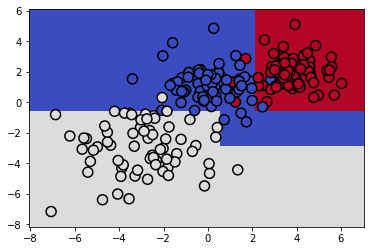

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

### Работа с датасетом Аутентификация банкнот
Предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Параметры решающего дерева, которые понадобятся для решения задачи:
- max_depth — максимальная глубина дерева.
- max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- min_samples_leaf — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.




### Задание 5.2.2
По графику выше определите, какова максимальная глубина этого решающего дерева? (Это сбалансированное дерево, т. е. все его ветви одинаковой глубины)

Ответ: 3 (три)  

*Комментарий*: плоскость делят 4 прямые, следовательно есть 4 разделения выборки надвое, для такого количества разделений дерево должно быть как минимум глубины 3

### Задание 5.2.3
Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.  
Параметры решающего дерева, которые понадобятся для решения задачи:  
- max_depth — максимальная глубина дерева.
- max_features — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.
- min_samples_leaf — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.

Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная Class. Размер тестовой выборки возьмите за 0.2, random_state = 17 для разбиения и дерева. Максимальную глубину дерева примите за 3, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за 2. Какое значение f1-score вы получили? ***Округлите до трёх знаков после точки-разделителя.***

In [5]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

RANDOM_SEED = 17

df = pd.read_csv('bill_authentication.csv')
display(df.head(2))




,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [6]:
X = df.drop(['Class'], axis=1)
y= df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

dtc = DecisionTreeClassifier(max_features=2, max_depth=3, random_state=RANDOM_SEED)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

f1_score_ = f1_score(y_pred, y_test)
temp = f1_score_

print(f"f1_score = {round(temp,3)}")

f1_score = 0.866


### Задание 5.2.4
Проклассифицируйте банкноту с вектором признаков 2.04378,-0.38422,1.437292,0.76421. К какому классу она относится?

In [9]:
X_test_outside = np.array([2.04378,-0.38422,1.437292,0.76421])
y_pred = dtc.predict(X_test_outside.reshape(1, -1))

temp = y_pred
print(f"класс к которому относиться банкнота  {temp}")

класс к которому относиться банкнота  [0]


Здесь приведена визуализация того, как одно решающее дерево разделяет выборку, состоящую из трёх классов.

Видно, что решающее дерево может очень неплохо отделить каждый класс от всех остальных. Разделяющая поверхность каждого класса кусочно-постоянная, и при этом каждая сторона поверхности параллельна оси координат, так как каждое условие сравнивает значение ровно одного признака с порогом.

В то же время решающее дерево вполне может переобучиться: его можно сделать настолько глубоким, что каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки. В этом случае, если записать в каждом листе ответ соответствующего объекта, на обучающей выборке получается нулевая ошибка. Дерево получается явно переобученным. Пример такого дерева:

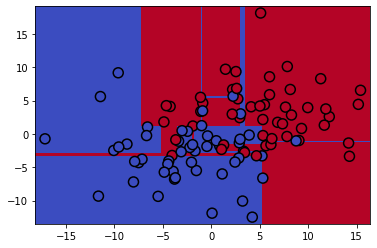

In [10]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

### РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

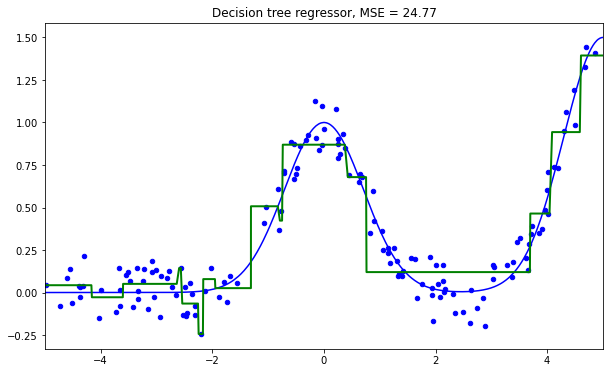

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

### БОРЬБА С ПЕРЕОБУЧЕНИЕМ (РЕГУЛЯРИЗАЦИЯ)  
Приведём несколько возможных способов сделать алгоритм более обобщающим, т.е. менее заточенным под конкретную выборку:  
- Задать порог по мере неопределённости: $I(S) \leq \theta$
- Задать порог по размеру узла: $\left |S \right | \leq n$
- Задать порог на глубину: $Depth(T)=d$
- Задать порог на размер потомков $\left | S_L \right |\leq n_1$ & $\left | S_R \right | \leq n_2$, здесь $S$ — это узел дерева, $T$ — дерево, $|S|$ — количество элементов в узле, $S_L, S_R$ — соответственно правый и левый потомок узла $S$.

### Задание 5.2.5
Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за 0.3, random_state = 42 для разбиения и дерева. Вычислите RMSE, округлите до двух знаков после точки-разделителя.


In [12]:
RANDOM_SEED = 42

df = pd.read_csv('petrol_consumption.csv')
display(df.head(2))

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(['Petrol_Consumption'], axis=1)
y= df.Petrol_Consumption

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

RMSE = mean_squared_error(y_test,y_pred)**0.5
temp1 = RMSE
temp2= dtr.get_depth()


print(f"RMSE = {round(temp1,2)}")
print(f"Глубина дерева = {temp2}")

RMSE = 87.97
Глубина дерева = 11


### 5.3. Построение решающих деревьев


### ОБЩИЙ ВИД КРИТЕРИЯ ОШИБКИ  
Критерий ошибки состоит из двух слагаемых, каждый из которых соответствует дочерним узлам:

$$Q(X_m, j, t) = \frac{|X_{\ell}|}{|X_m|}S(X_{\ell}) + \frac{|X_{r}|}{|X_m|}S(X_r)$$

Функция $S(X)$ называется критерием информативности, её значение уменьшается с уменьшением разброса ответов на выборке .

Также стоит ввести такое понятие, как прирост информации (information gain):

$$IG(X_m, j, t) = S(X) - \frac{|X_{\ell}|}{|X_m|}S(X_{\ell}) - \frac{|X_{r}|}{|X_m|}S(X_r)$$

Это соотношение показывает, насколько изменилась информативность при данном разбиении, т.е. по значению  признака .

При помощи деревьев решений можно прогнозировать и количественные признаки (регрессия). В этом случае идея построения остается той же, но оптимизируется иной критерий:
$$Q(X_m, j, t) = \frac{1}{|X|} \sum\limits_{i \in X} (y_i - \frac{1}{|X|} \sum\limits_{i \in X} y_i)^2,$$
где $i$ — число объектов в листе, $y_i$ — значения целевого признака. Попросту говоря, минимизируя дисперсию вокруг среднего, мы ищем признаки, разбивающие выборку таким образом, что значения целевого признака в каждом листе примерно равны.

### 1. ЭНТРОПИЙНЫЙ КРИТЕРИЙ ИНФОРМАТИВНОСТИ

Энтропия Шеннона определяется для системы с возможными состояниями следующим образом:
$$S(X) = -\sum_{i=k}^{K}p_k \log_2{p_k}$$
где $p_k$ — вероятности нахождения системы в $k$-ом состоянии.

Это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения этого понятия (комбинаторные и теоретико-информационные), отметим, что интуитивно энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот. В нашем случае $K$ — это количество классов, $p_k$ — вероятность отношения объекта из $X$ к $k$-тому классу.

In [14]:
from math import log, e

def entropy(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

In [15]:
num_blue_balls = 9
num_red_balls = 11
sum_balls =num_blue_balls + num_red_balls

label = np.concatenate((np.zeros(num_blue_balls),np.ones(num_red_balls)), axis=0)
S_0 = entropy(label,2)
S_0

0.9927744539878084

In [16]:
num_blue_balls_1 = 8
num_red_balls_1 = 5
p_1 = (num_blue_balls_1 + num_red_balls_1)/sum_balls
label = np.concatenate((np.zeros(num_blue_balls_1),np.ones(num_red_balls_1)), axis=0)
S_1 = entropy(label,2)
S_1

0.961236604722876

In [17]:
num_blue_balls_2 = 1
num_red_balls_2 = 6
p_2 = (num_blue_balls_2 + num_red_balls_2)/sum_balls
label = np.concatenate((np.zeros(num_blue_balls_2),np.ones(num_red_balls_2)), axis=0)
S_2 = entropy(label,2)
S_2

0.5916727785823275

In [18]:
IG = S_0 - p_1*S_1 - p_2*S_2 
IG

0.16088518841412436

2. КРИТЕРИЙ ДЖИНИ

Кроме энтропийного критерия существуют и другие. Пусть $p_k$ — доля объектов класса $k$ в выборке $X$:
$$p_k = \frac{1}{X} \sum\limits_{i \in X} [y_i = k]$$
Критерий информативности Джини формулируется в следующем виде:

$$S(X) = \sum\limits_{k=1}^{K}p_k(1-p_k)$$

Все слагаемые в сумме неотрицательные, поэтому критерий Джини также неотрицателен. Его оптимум достигается только в том случае, когда все объекты в $X$ относятся к одному классу.

КРИТЕРИЙ ОСТАНОВКИ (ИЛИ КРИТЕРИЙ ОСТАНОВА)  
Кроме критерия информативности, необходимо рассмотреть, какие мы можем вводить ограничения на дерево. Можно устанавливать различные критерии для остановки построения дерева, например:  
- Ограничение максимальной глубины дерева.
- Ограничение максимального количества листьев в дереве.
- Ограничение минимального числа объектов в одном листе.
- Ограничение, на сколько процентов минимально должен улучшаться функционал качества при новом разветвлении.

### 5.4. Построение решающих деревьев. Практика


In [19]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/dell/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e', 'log', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### Генерация данных

In [21]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [22]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

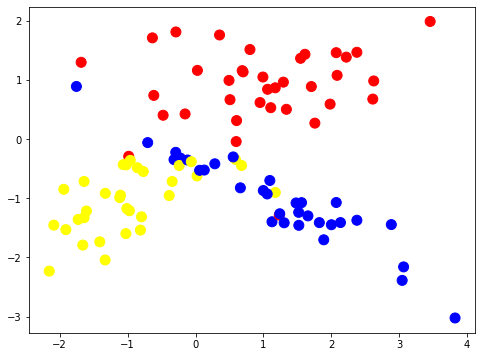

In [23]:
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)

In [24]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], classification_problem[1], test_size = 0.3,random_state = 1)

### Модель DecisionTreeClassifier

In [25]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

In [26]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

In [27]:
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### Разделяющая поверхность

In [28]:
def get_meshgrid(data, step=.1, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [29]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

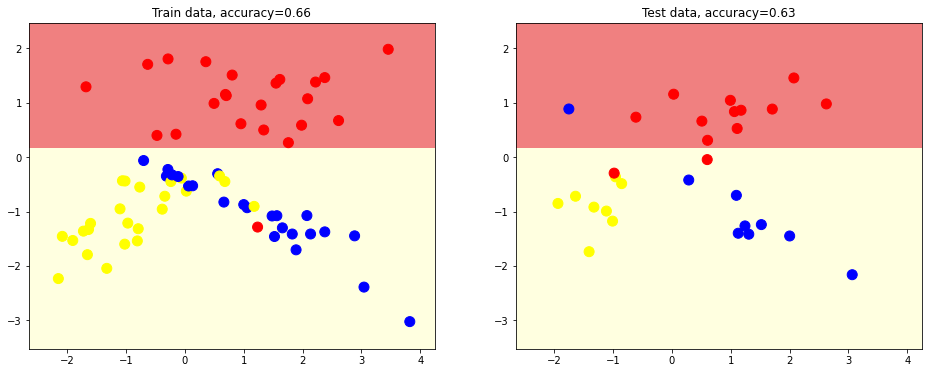

In [30]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

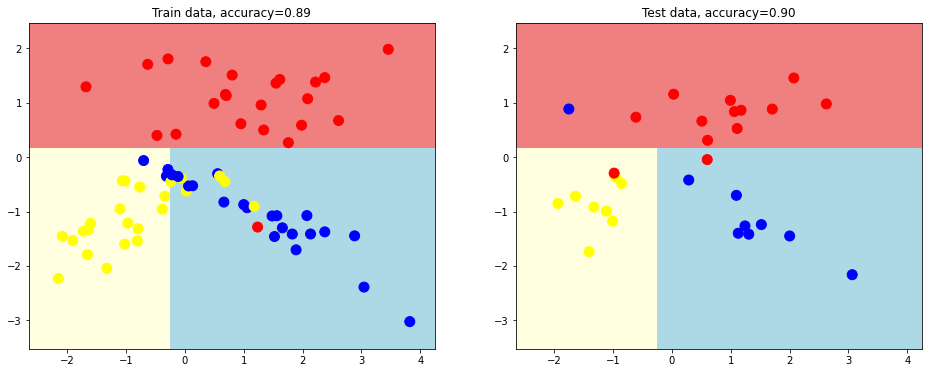

In [31]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)

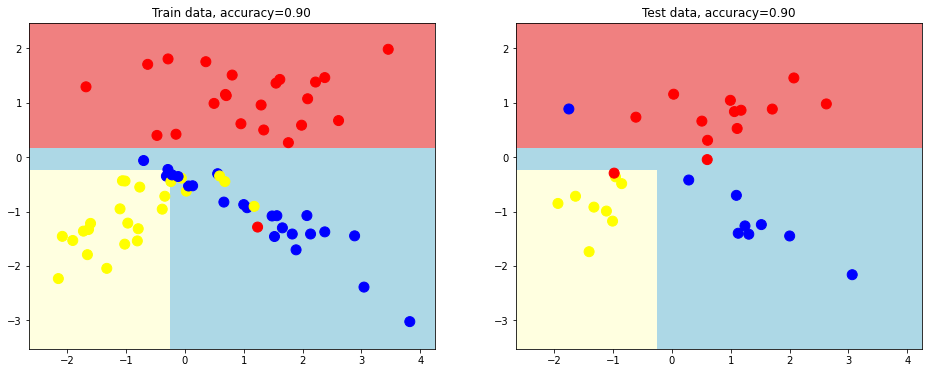

In [32]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

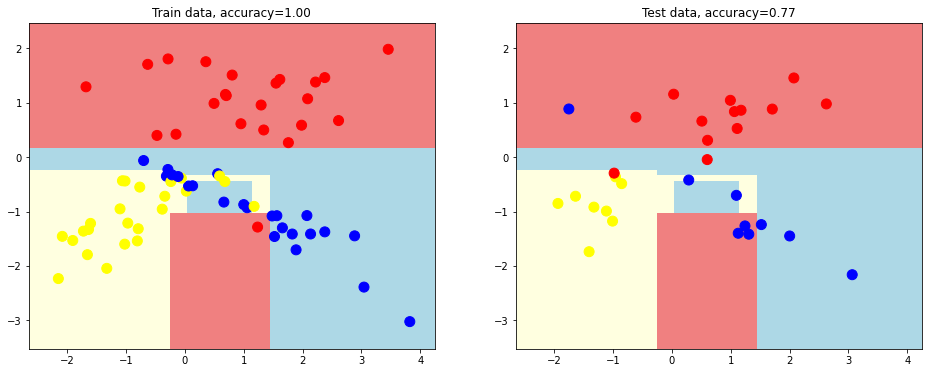

In [33]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

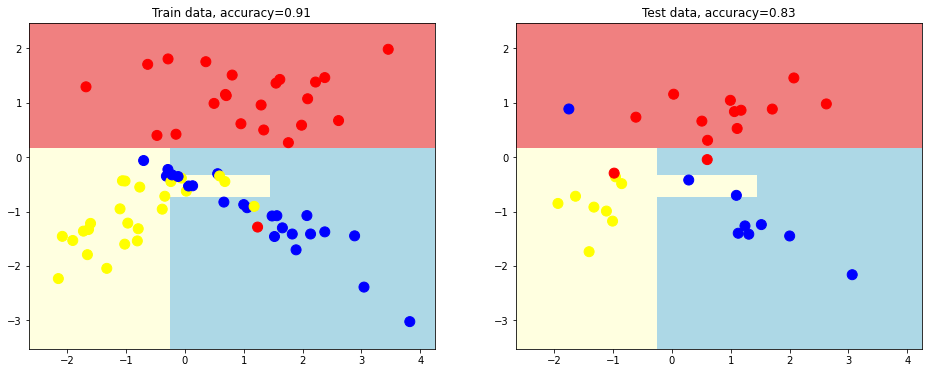

In [34]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 4), 
                      train_data, train_labels, test_data, test_labels)

### Задание 5.4.1
На рисунке представлено решающее дерево «Ситуации из жизни» с признаками «количество доступных денег» и «количество времени до важного события».  
Пусть дана следующая выборка из пяти объектов (первый признак — деньги, второй — время):

[250, 45]

[100, 35]

[400, 30]

[250, 60]

[300, 50]

Сколько из них попадёт в красный лист?  

Ответ: 1

### Задание 5.4.2
Что такое «количество объектов в вершине»?

- Количество объектов, которые попадут в эту вершину при старте из корня дерева и движении согласно записанным в вершинах условиях

Что из приведённого отражает принцип построения дерева решений?

- Дерево строится жадно, начиная с одной вершины, разбиваем её на две, после чего рекурсивно повторяем процедуру для новых дочерних вершин.

Пусть решается задача классификации с помощью решающего дерева. Ниже приведены разные варианты распределения классов в какой-то произвольной вершине ([c1, c2, c3] означает, что в вершине c1 объектов первого класса, c2 объектов второго класса и c3 объектов третьего класса). Какой из них должен получить меньшее значение критерия информативности?

- [95, 3, 2] 

Можно ли решать задачу регрессии с помощью решающих деревьев?

- Да, можно — достаточно лишь выбрать критерий информативности, оценивающий разброс вещественных ответов

Какую форму будет иметь разделяющая поверхность, построенная деревом с условиями вида  в вершинах ? Считайте, что в выборке два признака.

- Кусочно-постоянная кривая, участки которой будут параллельны осям координат

### ДОПОЛНИТЕЛЬНЫЕ МАТЕРИАЛЫ
Презентация (https://www.youtube.com/watch?v=UYDwhuyWYSo&ab_channel=ComputerScienceCenter) Анны-Вероники Дорогуш про CatBoost, Computer Science Center.
Материал (https://lightgbm.readthedocs.io/en/latest/Features.html#optimization-in-accuracy) с описанием алгоритма построения дерева в LightGBM.
Конспект лекции (https://www.hse.ru/mirror/pubs/share/215285956) Е. А. Соколова про решающие деревья.
Имплементация деревьев (https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/tree/_tree.pxd) в Scikit-Learn.
Материал (http://www.saedsayad.com/decision_tree.htm) про ID3 (англ.)

### 5.5. Бэггинг


#### АНСАМБЛЬ МОДЕЛЕЙ (БЭГГИНГ)

_Bagging_ — это параллельный способ построения ансамбля. Коротко о способе построения:

- Обучающая выборка сэмплируется k раз с помощью bootstrap (выбор с возвращением).
- На каждом сэмпле обучается отдельная базовая модель.
- Ответы моделей усредняются (возможно, с весами).  

Необходимость бэггинга может возникнуть тогда, когда вы уже нашли хорошую модель, и никак больше не можете повысить ее качество. В этом случае можно перейти к более продвинутой истории: использовать не одну модель (пусть и очень хорошую!), а ансамбли моделей. Под термином ансамбли понимается ряд продвинутых техник машинного обучения, о которых мы поговорим далее.

#### ПРИМЕР: ТЕОРЕМА КОНДОРСА
Проиллюстрируем идею ансамблей на известном примере — теореме Кондорса о жюри присяжных, которая датируется аж 1784 годом! 

Представим, что у нас есть несколько членов жюри, мнение каждого из них независимо от мнения других. Мы не знаем, какая вероятность принятия верного решения у каждого члена жюри. Однако мы понимаем, что если вероятность принять правильное решение у какого-то члена жюри больше, чем 0.5, то и общая вероятность принять верное решение возрастает. И наоборот, если вероятность принять правильное решение у какого-то члена жюри меньше, чем 0.5, то общая вероятность принять верное решение падает.

### БЭГГИНГ (BAGGING, BOOTSTRAP AGGREGATING)

Цель бэггинга заключается в том, чтобы создать ансамбль из нескольких моделей. Такая ансамблевая модель будет надежнее, чем составляющие ее части.

В основе бэггинга лежит статистический метод, который называется бутстрэпом (bootstrap). Идея бутстрэпа заключается в генерации выборок размера B (так называемых бутстрэп-выборок) из исходного датасета размера N путем случайного выбора элементов с повторениями в каждом из наблюдений B.

Рассмотрим идею бутстрэпа на элементарном примере.

Пусть у нас есть выборка из 12 элементов. Тогда мы можем из нее выбирать различные выборки из нового количества элементов (в данном случае из 5). При этом, если мы использовали какой-то объект, то мы можем использовать его снова. Таким образом, мы можем из одной выборки получить множество новых.



При некотором приближении можно считать, что получающиеся выборки являются независимыми и репрезентативными.

Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок, которые являются независимыми и репрезентативными (но, опять же, стоит отметить, что такими их можно считать только при нескольких допущениях).

Перейдем к понятию бэггинга. При построении моделей всегда присутствует вероятность, что при обучении на других данных мы получили бы другие результаты. Для того, чтобы нивелировать такую вероятность, можно использовать бэггинг. 

Его идея состоит в том, что мы берем несколько независимых моделей и усредняем полученные по ним результаты. Таким образом, мы получаем модель, имеющую меньший разброс, так как при ее построении мы учли несколько моделей. Как уже было сказано, в реальности получить много независимых выборок слишком сложно в силу того, что найти столько данных обычно не представляется возможным. Поэтому мы используем бутстрэп-выборки. 

Важно отметить, что при бэггинге размер каждой бутстрэп-выборки должен совпадать с размером исходной выборки.

Схематично процесс бэггинга можно представить следующим образом:


#### RANDOM SUBSPACES (RSS)

Для построения набора различных моделей используется также метод выбора случайных подвыборок признаков Random Subspaces. Метод обеспечивает устойчивость алгоритма к набору доступных признаков.

### Задание 5.5.1
Пусть у нас есть выборка [A,B,C,D,E,F]. Мы хотим использовать бэггинг для обучения моделей на этой выборке. Какие бутстрэп-выборки размера 6 могли получиться из нее?

Ответ:  
    
    
- [A,B,C,D,E,F]
- [A,A,A,A,A,A]
- [C,B,C,D,F,F]

Если мы обучаем бэггинг над решающими деревьями, то какое из утверждений верно?  
Ответ: Оба верны 

### Задание 5.5.2
#### ЗАДАЧА О ВИНАХ  
Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах. 
Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр quality которого не менее 6.  
Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.  
Разбейте выборку на обучающую и тренировочную с параметрами test_size=0.30, random_state=42.  
Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (random_state=42, максимальная глубина равна 10).

Введите значение f1 score для классификатора, который показал наилучшее значение. Округлите до трёх знаков после точки-разделителя.

In [43]:
df = pd.read_csv('winequality-red.csv', sep=';', quotechar="*", escapechar='"', header=0, names =['fixed acidity',"volatile acidity","citric acid","residual sugar",
                          "chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])

df['quality']=df['quality'].apply(lambda x: 1 if x>=6 else 0)
display(df.head(2))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


In [44]:
from sklearn.linear_model import LogisticRegression
RANDOM_SEED = 42

X = df.drop('quality', axis=1)
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=RANDOM_SEED)

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
f1_score_lr = f1_score(y_test,y_pred)

dtc = DecisionTreeClassifier(random_state=42,max_depth = 10)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
f1_score_dtc = f1_score(y_test,y_pred)

temp1 = f1_score_lr
temp2= f1_score_dtc


print(f"f1_score_lr = {round(temp1,3)}")
print(f"f1_score_dtc = {round(temp2,3)}")

f1_score_lr = 0.733
f1_score_dtc = 0.723


/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Обучите модель с использование бэггинга (функция BaggingClassifier с random_state=42, разделение выборки на обучающую и тренировочную с параметрами test_size=0.30, random_state=42) для алгоритма, показавшего лучшее качество, определите количество моделей 1500. Вычислите новое значение f1-score.

In [45]:
from sklearn.ensemble import BaggingClassifier

bggc = BaggingClassifier(base_estimator=dtc, n_estimators=1500, random_state=42)
bggc.fit(X_train, y_train)
y_pred = bggc.predict(X_test)
f1_score_bggc = f1_score(y_test,y_pred)

temp3= f1_score_bggc
print(f"f1_score_bggc:= {round(temp3,3)}")

f1_score_bggc:= 0.819


### 5.6. Случайный лес

Решающие деревья являются хорошим семейством базовых классификаторов для бэггинга, поскольку они достаточно сложны и могут достигать нулевой ошибки на любой выборке. 

Метод случайных подпространств позволяет снизить коррелированность между деревьями и избежать переобучения. Базовые алгоритмы обучаются на различных подмножествах признакового описания, которые также выделяются случайным образом. Над классическим бэггингом над деревьями решений, который мы рассмотрели в прошлом уроке, они имеют ряд преимуществ, заключающихся в возможности более точной настройки параметров модели.

#### АЛГОРИТМ ПОСТРОЕНИЯ СЛУЧАЙНОГО ЛЕСА, СОСТОЯЩЕГО ИЗ ДЕРЕВЬЕВ

Для каждого:

- сгенерировать выборку с помощью бутстрэпа;
- построить решающее дерево по выборке: по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки → дерево строится, пока в каждом листе не более объектов или пока не достигнем определенной высоты дерева → при каждом разбиении сначала выбирается несколько случайных признаков из исходных, и оптимальное разделение выборки ищется только среди них.

Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

#### РЕАЛИЗАЦИЯ НА PYTHON  И ПОДБОР ПАРАМЕТРОВ


Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.

Будем предсказывать погоду. 

Откроем датасет, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки:

In [46]:
weather=pd.read_csv('temps_extended.csv')
y = weather['actual']
X = weather.drop(['actual','weekday','month','day','year'],axis =1)
X_train, X_val, Y_train, Y_val=train_test_split(X,y,test_size=0.3, random_state=42)

Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.

Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:

In [47]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Параметры по умолчанию:\n')
pprint(rf.get_params())

Параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [49]:
# Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:
# n_estimators 
# max_features 
# max_depth 
# min_samples_split 
# min_samples_leaf
# bootstrap
#Мы можем сами указать, какие значения гиперпараметров надо перебрать.
#Зададим сетку гиперпараметров, которые будут перебираться:

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [51]:
# Обучим наш лес:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [52]:
# Давайте посмотрим, какие гиперпараметры нам предлагают как оптимальные:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

### Задание 5.6.1
Обучите случайный лес с предустановленными параметрами и теми параметрами, которые мы отобрали как оптимальные. В обоих вариантах поставьте random_state =42. Какое улучшение MSE дала подстановка отобранных гиперпараметров?

In [ ]:
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

mse_rfr_params_default = mean_squared_error(y_test, y_pred)


# на гиперпараметрах которые нам предлагают как оптимальные
rfr2 = RandomForestRegressor(n_estimators=1000, 
                             min_samples_split=2, 
                             min_samples_leaf=2, 
                             max_features='sqrt', 
                             max_depth=60, 
                             bootstrap=True, 
                             random_state = 42)
rfr2.fit(X_train, y_train)
y_pred = rfr2.predict(X_test)
mse_rfr2_recom_params = mean_squared_error(y_test, y_pred)
temp1 = mse_rfr_params_default
temp2 = mse_rfr2_recom_params


print(f"MSE на параметрах по умолчанию = {round(temp1,3)}")
print(f"MSE на рекомендованных параметрах = {round(temp2,3)}")
print(f"улучшение MSE на рекомендованных параметрах = {round(temp2-temp1,3)}")

### 5.7. Практика

Разберёмся с ансамблями алгоритмов и со случайным лесом. Рассмотрим данные о сотрудниках компании, где указывается, ушёл сотрудник или нет.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('HR-dataset.csv')

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

target = 'left'
features = df.columns.drop(target)
features = features.drop('empid')  # Удалим идентификатор пользователя как нерепрезентативный признак
print(features)

X, y = df[features].copy(), df[target]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


In [59]:
# Считаем данные: это характеристики сотрудников некоторой компании. Построим модель, которая предсказывает уход сотрудника.
print(df.shape)
df.head()

(14999, 11)


,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,1001,0.38,0.53,2,157,3,0,1,0,sales,low
1,1002,0.80,0.86,5,262,6,0,1,0,sales,medium
2,1003,0.11,0.88,7,272,4,0,1,0,sales,medium
3,1004,0.72,0.87,5,223,5,0,1,0,sales,low
4,1005,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
# Заменим идентификатор отдела, к которому относился сотрудник, на количество людей в отделе, а зарплату — на ординальную категорию. Масштабируем признаки для последующего сравнения результатов.
salary_ordinals = {'low': 1, 'medium': 2, 'high': 3}

X['dept'] = X['dept'].apply(X['dept'].value_counts().get)
X['salary'] = X['salary'].apply(salary_ordinals.get)

In [61]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

In [62]:
# В дальнейшем будем оценивать качество модели на кросс-валидации на 5 фолдах при помощи точности (accuracy).
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='f1').mean()

Посмотрим на то, как работает бэггинг над решающими деревьями.  
__Бэггинг__ (bagging, bootstrap aggregating) $-$ метод построения композиции алгоритмов, в котором каждый алгоритм строится независимо от других на подвыборках обучающей выборки. Итоговый алгоритм принимает решения посредством голосования среди всех алгоритмов (возвращается самый частый ответ).

В рамках бэггинга мы берём алгоритм и обучаем его на подвыборках исходной обучающей выборки, не на всех объектах, а на части. Когда мы оборачиваем алгоритм в BaggingClassifier, мы улучшаем результат. Ещё больше улучшить результат можно с помощью другой эвристики — Random Subspaces — сокращение количества признаков, которые показываются алгоритму. Обе эвристики дают нам случайный лес.

In [63]:
# Посмотрим на точность одного дерева.
tree = DecisionTreeClassifier(max_depth=30)
print("Decision tree:", estimate_accuracy(tree, X, y))

Decision tree: 0.9450045314500757


Композиция отдельных деревьев показывает себя лучше чем одно дерево. Структура дерева сильно зависит от обучающей выборки, а значит что, если немного изменить обучающую выборку, то дерево сильно изменится. Бэггинг идеально подходит в этом случае, поскольку композиция алгоритмов при помощи голосования работает наилучшим образом, когда модели различны.

Увеличить различность построенных деревьев можно указав параметры `max_features` и `max_depth`.

In [65]:
random_tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))), max_depth=30)
print("Random tree:", estimate_accuracy(random_tree, X, y))

Random tree: 0.9522943517711001


In [66]:
bagging_random_trees = BaggingClassifier(random_tree)
print("Random tree bagging:", estimate_accuracy(bagging_random_trees, X, y))

Random tree bagging: 0.9792532280847904


Именно так внутри и работает так называемый __случайный лес__ (Random Forest): он обучает набор деревьев (параметр `n_esimators`), каждое из которых обучается на подмножестве признаков (Random Subspaces) и на подмножестве объектов (bootstrap). Получается, что случайный лес случаен и по признакам, и по объектам. Ответы каждого дерева аггрегируются при помощи голосования.  
Стандартная эвристика: в задаче классификации брать квадратный корень числа признаков, а в задаче регрессии треть числа признаков.

Случайный лес обучает набор деревьев, каждое из которых обучается на подмножестве признаков (Random Subspaces) и на подмножестве объектов (bootstrap). То есть случайный лес получается случайным по двум этим параметрам, а ответы аггрегируются при помощи голосования.

**Стандартная эвристика: в задаче классификации брать квадратный корень числа признаков, а в задаче регрессии треть числа признаков.**

In [67]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_features=int(np.sqrt(len(features))),
    max_depth=30)
print("Random Forest:", estimate_accuracy(random_forest, X, y))

Random Forest: 0.9826797329616903


Ещё одно преимущество использования бэггинга для аггрегации моделей — получение оценки работы классификатора без дополнительного проведения кросс-валидации при помощи out-of-bag score. Это метод вычисления произвольной оценки качества во время обучения бэггинга. Для подсчёта требуется указать параметр oob_score = True, что имеет смысл при достаточном количестве деревьев.

In [68]:
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(len(features))),
    max_depth=30,
    oob_score=True,
    n_jobs=-1
)
random_forest.fit(X, y)
random_forest.oob_score_.mean()

0.9930662044136276

Метод бэггинга можно применять к произвольным алгоритмам, например к логистической регрессии.

In [69]:
lr = LogisticRegression(solver='saga', max_iter=200)
lr.fit(X, y)
print("LR:", estimate_accuracy(lr, X, y))

LR: 0.44172459802488306


In [70]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.4365451576623669


В ее случае он не так сильно повышает качество, поскольку линейные модели не так сильно зависят от состава обучающей выборки.
Попробуем убрать часть признаков.

In [71]:
random_logreg = BaggingClassifier(
    lr,
    n_estimators=10,
    n_jobs=-1,
    max_features=0.5,
    random_state=42
)
print("Bagging for LR:", estimate_accuracy(random_logreg, X, y))

Bagging for LR: 0.22025904904521182


В случае линейной регрессии повышение разнообразности моделей не дает такого прироста как с деревьями, поскольку модели сильно теряют в качестве.

#### Сравнение логистической регрессии и случайного леса

In [73]:
def plot_predictions(X, y, clf, proba=False, points_size=7, xlabel='x', ylabel='y'):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_std, y_std = data.std(axis=0)
        x_min, x_max = data[:, 0].min() - x_std / 2, data[:, 0].max() + x_std / 2
        y_min, y_max = data[:, 1].min() - y_std / 2, data[:, 1].max() + y_std / 2
        return np.meshgrid(np.linspace(x_min, x_max, num=200),
                           np.linspace(y_min, y_max, num=200))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.figure(figsize=(10.0, 10.0))
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=points_size, cmap=plt.cm.coolwarm, alpha=0.90)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    return clf

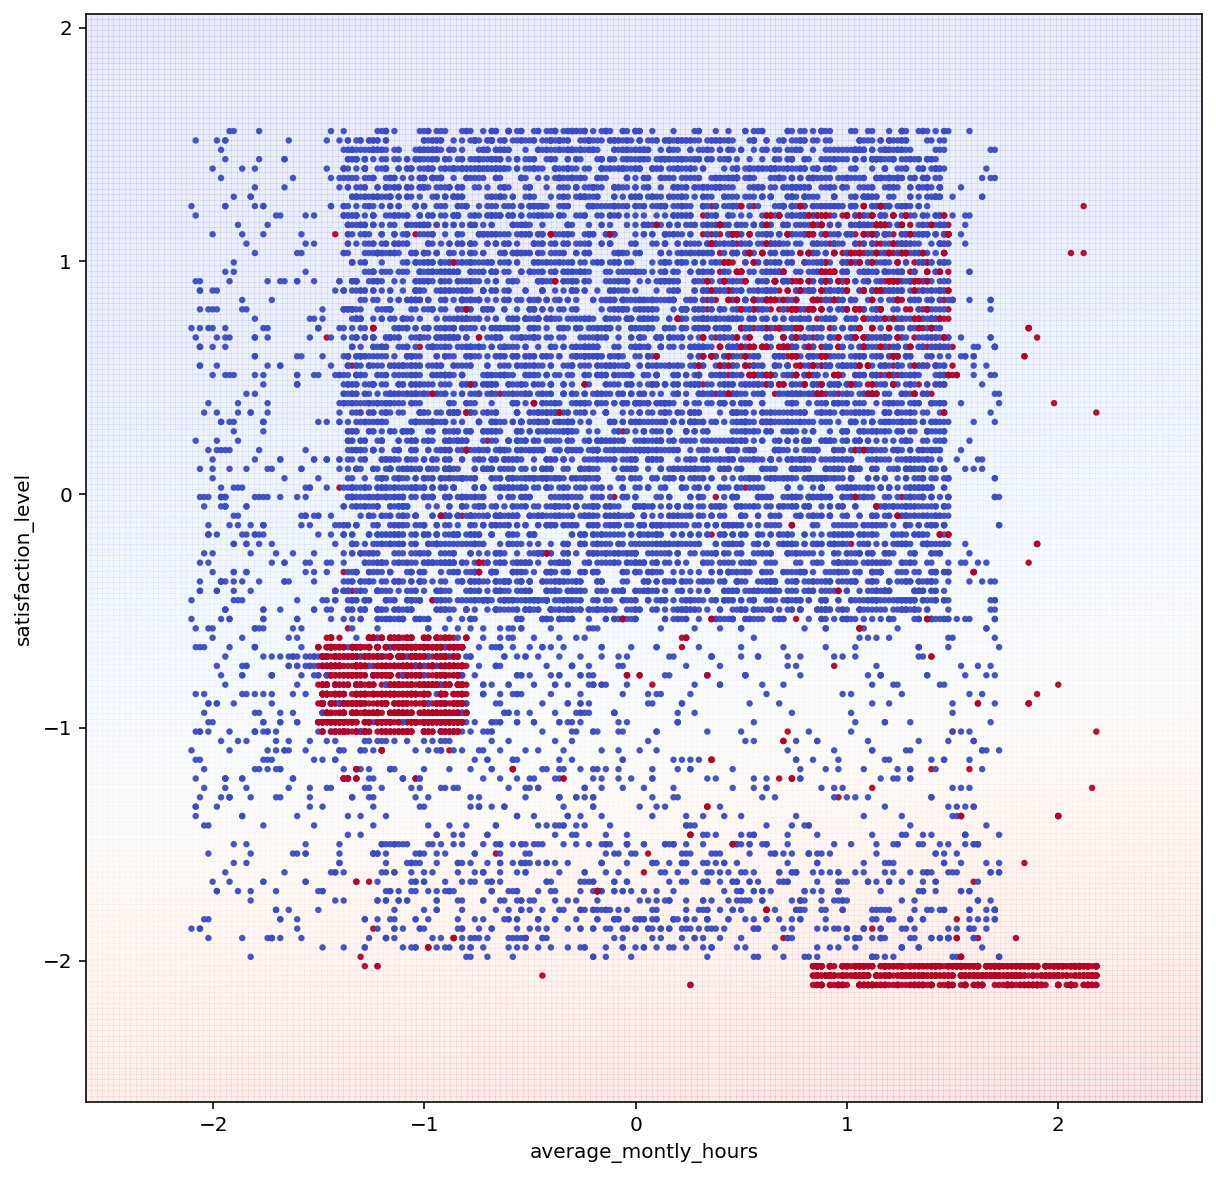

In [74]:
plot_predictions(X[['average_montly_hours', 'satisfaction_level']].values, y,
                 lr,
                 points_size=5,
                 proba=True, xlabel='average_montly_hours', ylabel='satisfaction_level');

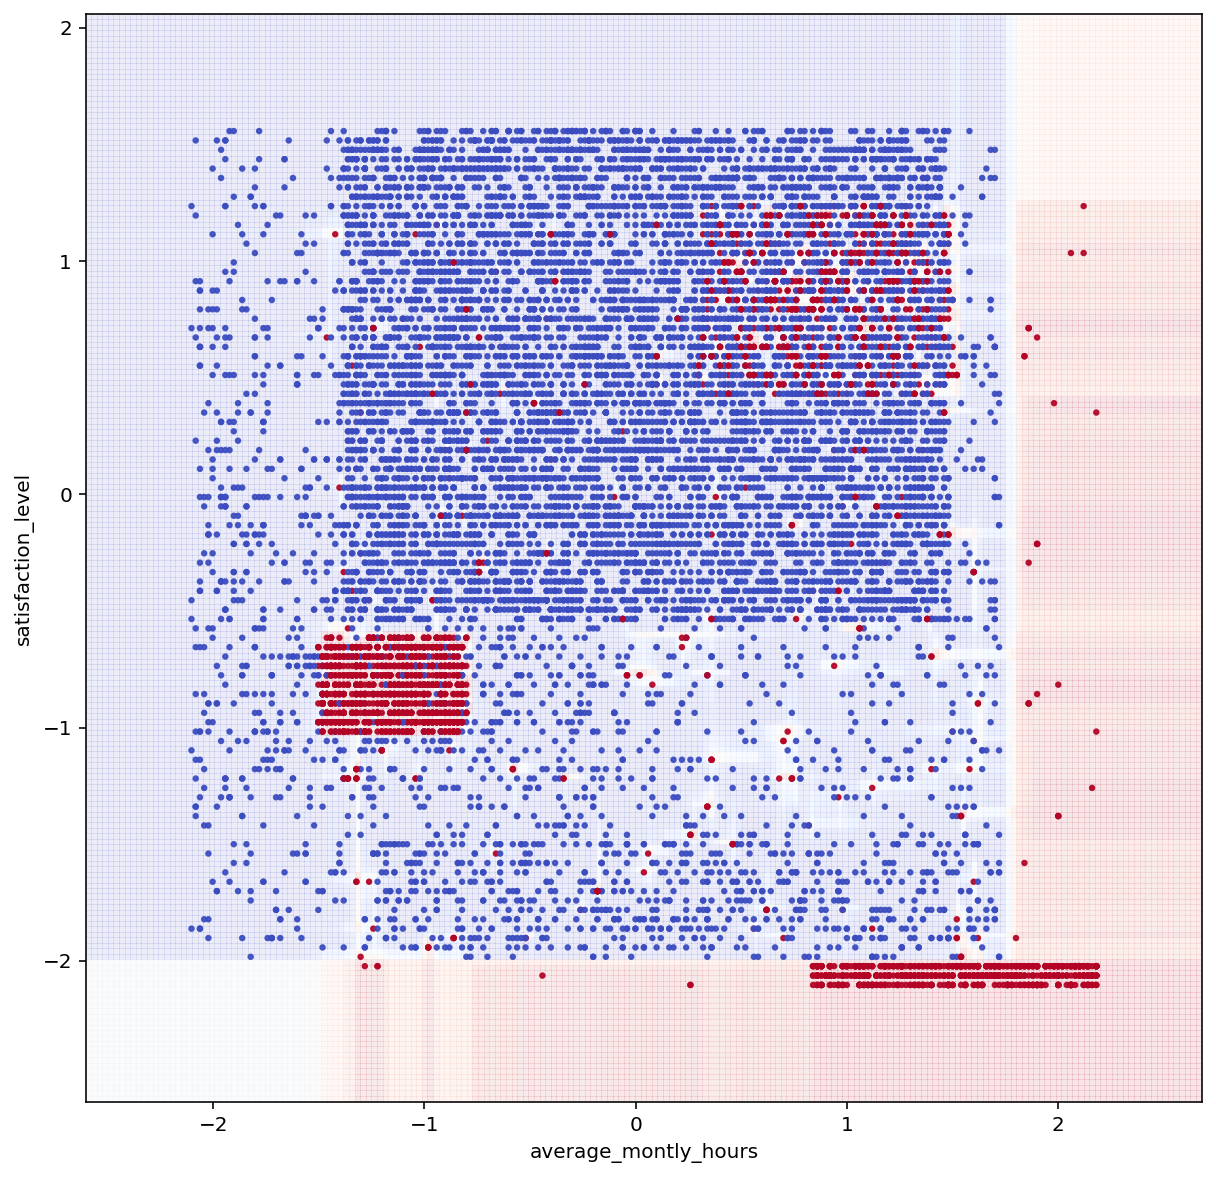

In [75]:
plot_predictions(X[['average_montly_hours', 'satisfaction_level']].values, y,
                 RandomForestClassifier(
                     max_depth=30,
                     n_estimators=100,
                     n_jobs=-1
                 ),
                 points_size=5,
                 proba=True, xlabel='average_montly_hours', ylabel='satisfaction_level');

### ПРАКТИКА

1. Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков  и ответы на обучающей выборке  (вам потребуются поля data и target в объекте, который возвращает load_wine). 

2. Информацию о датасете вы можете получить, обратившись к полю DESCR у возвращаемого объекта load_digits. Нам предстоит решать задачу классификации изображений с цифрами по численным признакам.

3. Для оценки качества мы будем использовать cross_val_score из sklearn.model_selection с параметром $cv=10$. Эта функция реализует k-fold cross validation c $k$ равным значению параметра $cv$. Предлагается использовать $k=10$, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и $k=5$. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет $k$ чисел — качество в каждом из $k$ экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадёт в диапазон, заданный для правильных ответов — в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Чтобы ускорить вычисление cross_val_score, следует попробовать использовать параметр n_jobs. Число, которое вы подаёте в качестве этого параметра, соответствует количеству потоков вашего процессора, которое будет задействовано в вычислении. Если указать n_jobs = -1, тогда будут задействовано максимальное число потоков.

### Задание 5.7.1
1. Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

Эту величину введите в поле для ответа (ваше значение должно попасть в заданный интервал).

In [76]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
dtc = DecisionTreeClassifier()

temp = cross_val_score(dtc, X, y, cv=10).mean()


print(f"cross_val_score на параметрах по умолчанию = {round(temp,3)}")

cross_val_score на параметрах по умолчанию = 0.835


2. Теперь давайте обучим BaggingClassifier на основе DecisionTreeClassifier. Из sklearn.ensemble импортируйте BaggingClassifier, все параметры задайте по умолчанию. Нужно изменить только количество базовых моделей, задав его равным 100.

В поле для ответа введите качество бэггинга на нашем датасете (ваше значение должно попасть в заданный интервал).

Подумайте, какие выводы можно сделать из соотношения качества одиночного дерева и бэггинга деревьев?

In [77]:
from sklearn.ensemble import BaggingClassifier
bggc = BaggingClassifier(dtc, 
                         n_estimators=100)
temp = cross_val_score(bggc, X, y, cv=10).mean()

print(f"cross_val_score при использовании BaggingClassifier = {round(temp,3)}")

cross_val_score при использовании BaggingClassifier = 0.924


3. Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt{d}$ случайных признаках.

В поле для ответа введите качество работы получившегося классификатора (ваше значение должно попасть в заданный интервал).

Корень из числа признаков — часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три,  тоже имеет место быть. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков, добиваясь лучшего качества на кросс-валидации.

In [78]:
bggc_on_sqrt_features = BaggingClassifier(dtc, 
                                          n_estimators=100, 
                                          max_features=int((X.shape[1])**0.5))
temp = cross_val_score(bggc_on_sqrt_features, X, y, cv=10).mean()

print(f"cross_val_score при использовании BaggingClassifier на √d случайных признаках = {round(temp,3)}")

cross_val_score при использовании BaggingClassifier на √d случайных признаках = 0.93


4. В предыдущем пункте мы выбирали подмножество один раз для каждого очередного дерева. Следующим нашим шагом будет построение бэггинга на основе деревьев, которые выбирают случайное подможество признаков для каждой вершины дерева.

Для этого нам потребуется перенести отвечающий за это параметр из BaggingClassifier в DecisionTreeClassifier. Для этого вам из документации нужно выяснить, какой параметр DecisionTreeClassifier за это отвечает.

В поле для ответа введите значение этого параметра (ваше значение должно попасть в заданный интервал).

По-прежнему сэмплируем $sqrt(d)$ признаков.

In [79]:
dtc_random_set_on_sqrt_features = DecisionTreeClassifier(splitter='random',
                                                         max_features=int((X.shape[1])**0.5))
bggc = BaggingClassifier(dtc_random_set_on_sqrt_features, 
                         n_estimators=100)

temp = cross_val_score(bggc, X, y, cv=10).mean()

print(f"cross_val_score при использовании BaggingClassifier на основе деревьев, которые выбирают случайное подможество признаков для каждой вершины дерева на √d случайных признаках = {round(temp,3)}")

cross_val_score при использовании BaggingClassifier на основе деревьев, которые выбирают случайное подможество признаков для каждой вершины дерева на √d случайных признаках = 0.962


### Задание 5.7.2
Полученный в задании 4 классификатор — бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble?

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

На основе наблюдений выберите правильные утверждения из приведенных ниже  

Ответ:  

- При очень маленьком числе деревьев (5, 10, 15) случайный лес работает хуже, чем при большем числе деревьев.
- С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
- При большом количестве признаков (для данного датасета - 40-50) качество классификации становится хуже, чем при малом количестве признаков (10-15). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
- При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, так как из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг друга).